# Decision tree use  for classification problem as well  regression problem 
## Entrope is basically the measure of rendomness
### Gini Impurity =data is not 100% pure there are some mix Data (compuatationally efficiant this takes shorter period of time for exicuation 
### if the column provide the hogst number of information one should take that column as  parent nod

ID3 (Iterative Dichotomiser 3) for catagorical attribute
C4.5 (successor of ID3) same as ID3 USE FOR CLASSIFICATION 
CART (Classification And Regression Tree)[6]
Classification and regression trees (CART) are a non-parametric decision tree learning technique that produces either classification or regression trees, depending on whether the dependent variable is categorical or numeric, respectively.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv('loan_data.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
data.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [5]:
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


# Create a histogram of two FICO distributions on top of each other, one after the credit.policy result.

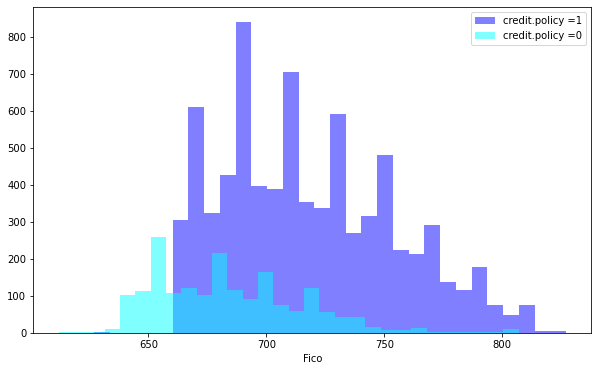

In [6]:
plt.figure(figsize=(10,6))
a=data[data['credit.policy']==1]['fico']
plt.hist(a,bins=30,color='blue',alpha=0.5,label='credit.policy =1')
b=data[data['credit.policy']==0]['fico']
plt.hist(b,bins=30,color='cyan',alpha=0.5,label='credit.policy =0')
plt.xlabel('Fico')
plt.legend()


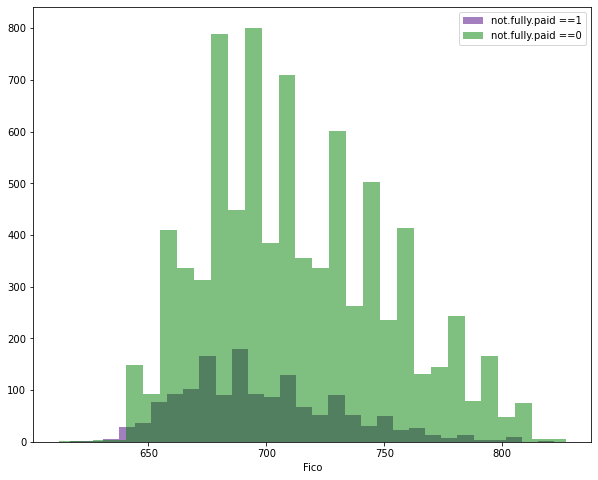

In [7]:
#Create an identical chart that this time separates by the "not.fully.paid" column.
plt.figure(figsize=(10,8))
c=data[data['not.fully.paid']==1]['fico']
plt.hist(c,alpha=0.5,color='indigo',label='not.fully.paid ==1',bins=30)
d=data[data['not.fully.paid']==0]['fico']
plt.hist(d,alpha=0.5,color='g',label='not.fully.paid ==0',bins=30)
plt.xlabel('Fico')
plt.legend()

#### Create a countplot using Seaborn that shows the number of loans by purpose. The Hue should be defined by the column "not.fully.paid".

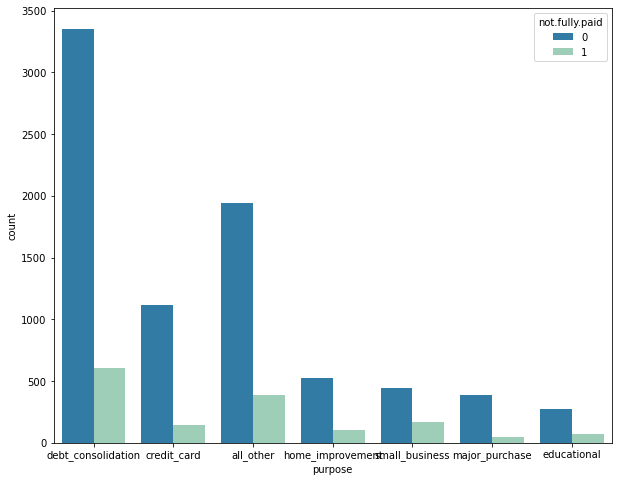

In [8]:
plt.figure(figsize=(10,8))
sns.countplot(x='purpose',data=data,palette='YlGnBu_r',hue='not.fully.paid')

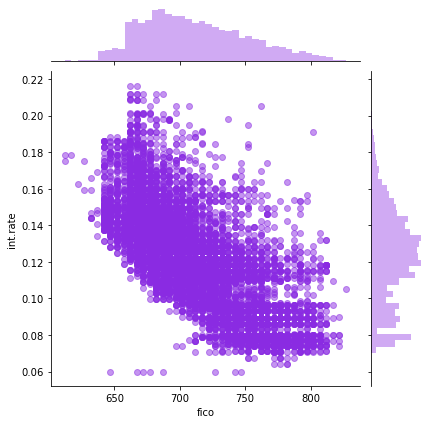

In [9]:
#Let's look at the trend between FICO Score and the interest rate. To do this, recreate the following jointplot.

sns.jointplot(x='fico',y='int.rate',data=data,color='blueviolet',alpha=0.5)

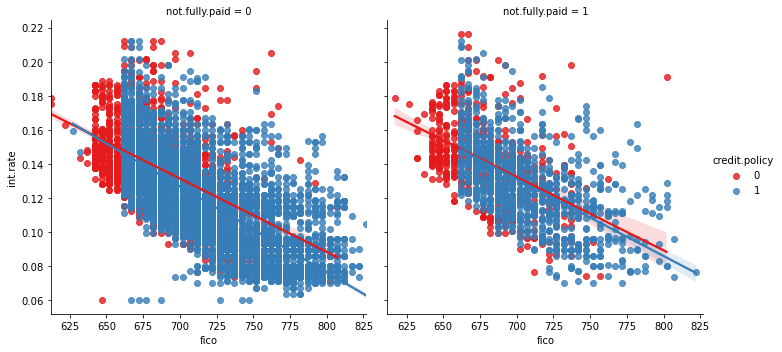

In [10]:
#Create the following lmplots to see if the trend is different between "not.fully.paid" and "credit.policy".
#Check the documentation of lmplot if you don't remember how to split into two columns.
sns.lmplot(y='int.rate', x='fico',data=data,hue='credit.policy',col='not.fully.paid',palette='Set1')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [12]:
pd.get_dummies(data,columns=['purpose'],drop_first=True)

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,0,0,0,1,0,0


In [13]:
final_data=pd.get_dummies(data,columns=['purpose'],drop_first=True)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X=final_data.drop('not.fully.paid',axis=1)
y=final_data['not.fully.paid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)


In [16]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
dtree= DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [19]:
prediction= dtree.predict(X_test)

[Text(319.0000400728392, 533.8928571428571, 'X[0] <= 0.5\ngini = 0.272\nsamples = 6704\nvalue = [5614, 1090]'),
 Text(150.18506807493932, 514.4785714285714, 'X[2] <= 349.935\ngini = 0.408\nsamples = 1317\nvalue = [941, 376]'),
 Text(115.22435338288835, 495.06428571428575, 'X[9] <= 6.5\ngini = 0.378\nsamples = 943\nvalue = [704, 239]'),
 Text(85.42200773665049, 475.65000000000003, 'X[1] <= 0.084\ngini = 0.36\nsamples = 815\nvalue = [623, 192]'),
 Text(84.37346404733009, 456.2357142857143, 'gini = 0.0\nsamples = 26\nvalue = [26, 0]'),
 Text(86.47055142597087, 456.2357142857143, 'X[17] <= 0.5\ngini = 0.368\nsamples = 789\nvalue = [597, 192]'),
 Text(56.15954945388349, 436.8214285714286, 'X[8] <= 50.95\ngini = 0.362\nsamples = 768\nvalue = [586, 182]'),
 Text(16.203276699029125, 417.40714285714284, 'X[8] <= 1.35\ngini = 0.313\nsamples = 329\nvalue = [265, 64]'),
 Text(6.29126213592233, 397.99285714285713, 'X[4] <= 6.54\ngini = 0.47\nsamples = 37\nvalue = [23, 14]'),
 Text(4.194174757281553

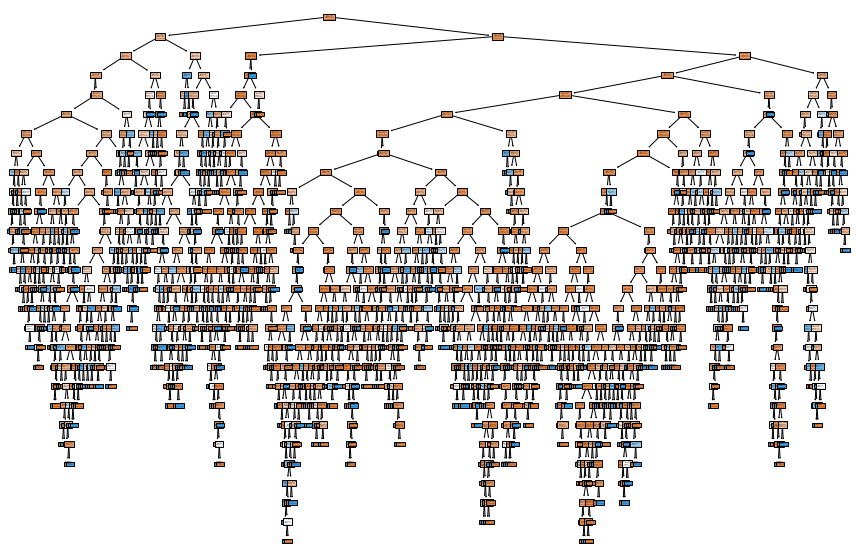

In [37]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dtree,filled=True)

In [21]:
from sklearn.metrics import classification_report,confusion_matrix

In [22]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      2431
           1       0.20      0.25      0.22       443

    accuracy                           0.73      2874
   macro avg       0.53      0.54      0.53      2874
weighted avg       0.76      0.73      0.74      2874



In [23]:
print(confusion_matrix(y_test,prediction))

[[1999  432]
 [ 333  110]]


In [40]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [41]:
rpfc=rfc.predict(X_test)

In [42]:
print(classification_report(y_test,rpfc))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        53
           1       0.99      0.97      0.98        90

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



# post pruning decision tree with cost complexity pruning 

In [25]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier

In [30]:
X,y=load_breast_cancer(return_X_y=True)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
clf=DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [34]:
pred1=clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred1)

0.8811188811188811

[Text(468.32142857142856, 513.4, 'X[7] <= 0.049\ngini = 0.468\nsamples = 426\nvalue = [159, 267]'),
 Text(298.9285714285714, 453.0, 'X[23] <= 952.9\ngini = 0.095\nsamples = 260\nvalue = [13, 247]'),
 Text(199.28571428571428, 392.6, 'X[13] <= 42.19\ngini = 0.054\nsamples = 252\nvalue = [7, 245]'),
 Text(119.57142857142856, 332.2, 'X[25] <= 0.454\ngini = 0.032\nsamples = 247\nvalue = [4, 243]'),
 Text(79.71428571428571, 271.8, 'X[21] <= 30.145\ngini = 0.024\nsamples = 246\nvalue = [3, 243]'),
 Text(39.857142857142854, 211.39999999999998, 'gini = 0.0\nsamples = 215\nvalue = [0, 215]'),
 Text(119.57142857142856, 211.39999999999998, 'X[14] <= 0.004\ngini = 0.175\nsamples = 31\nvalue = [3, 28]'),
 Text(79.71428571428571, 151.0, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(159.42857142857142, 151.0, 'X[1] <= 23.2\ngini = 0.067\nsamples = 29\nvalue = [1, 28]'),
 Text(119.57142857142856, 90.59999999999997, 'X[25] <= 0.157\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(79.71428571428571

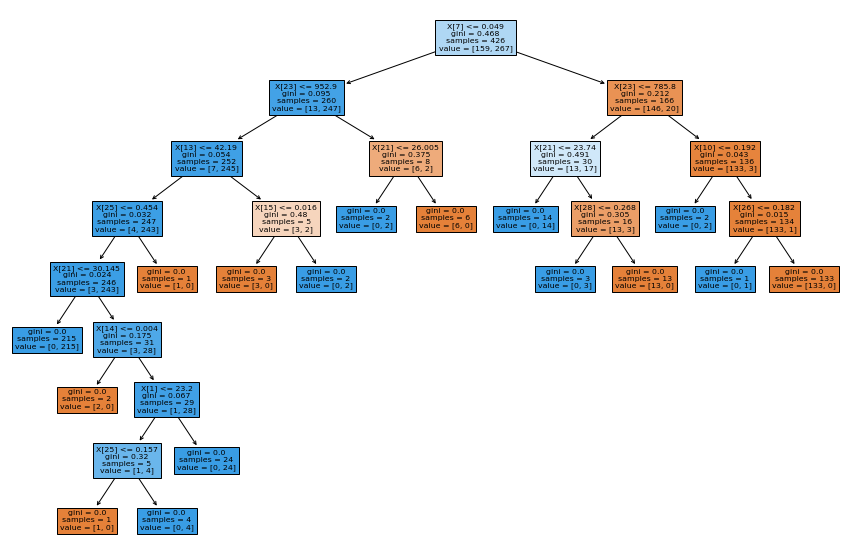

In [36]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)